In [1]:
import math

import matplotlib as mpl
mpl.rcParams['text.usetex'] = True 
mpl.rcParams['text.latex.preamble'] = r'\usepackage{libertine}' 
mpl.rc('font', family='serif')

import numpy as np
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt
from matplotlib import rc

rc('text', usetex=True)
plt.style.use('seaborn-notebook')

plt.rcParams['axes.titlesize'] = '25'
plt.rcParams['axes.labelsize'] = '25'
plt.rcParams['legend.fontsize'] = '15'
plt.rcParams['xtick.labelsize'] = '15'
plt.rcParams['ytick.labelsize'] = '15'

In [2]:
masterdata = pd.read_csv("../experiments/2019-03-31-15-32_BanditStaticK_/BanditStaticK.csv")
narms = masterdata.iloc[0]['k']

In [3]:
masterdata.tail(20)

,bandit,dataset,scalingstrategy,generator,k,gain,cputime,iteration
4999980,Exp3.M,StaticGenerator-200,KL-1-200-0.9,StaticGenerator-200,1.11,0.56,3.4006,99980
4999981,Exp3.M,StaticGenerator-200,KL-1-200-0.9,StaticGenerator-200,1.10,0.49,3.3879,99981
4999982,Exp3.M,StaticGenerator-200,KL-1-200-0.9,StaticGenerator-200,1.12,0.61,3.3830,99982
4999983,Exp3.M,StaticGenerator-200,KL-1-200-0.9,StaticGenerator-200,1.13,0.52,3.3830,99983
4999984,Exp3.M,StaticGenerator-200,KL-1-200-0.9,StaticGenerator-200,1.09,0.61,3.3903,99984
4999985,Exp3.M,StaticGenerator-200,KL-1-200-0.9,StaticGenerator-200,1.13,0.58,3.3819,99985
4999986,Exp3.M,StaticGenerator-200,KL-1-200-0.9,StaticGenerator-200,1.14,0.58,3.3695,99986
4999987,Exp3.M,StaticGenerator-200,KL-1-200-0.9,StaticGenerator-200,1.12,0.64,3.3416,99987
4999988,Exp3.M,StaticGenerator-200,KL-1-200-0.9,StaticGenerator-200,1.11,0.54,3.3695,99988
4999989,Exp3.M,StaticGenerator-200,KL-1-200-0.9,StaticGenerator-200,1.11,0.46,3.3429,99989


In [4]:
sorted(masterdata.bandit.unique())

['CUCB',
 'CUCBm',
 'Exp3.M',
 'IMP-TS',
 'MP-KLUCB',
 'MP-KLUCBPLUS',
 'MP-OTS',
 'MP-TS',
 'MP-TS-ADWIN-0.1',
 'OS']

In [5]:
masterdata['reward/arm'] = masterdata['gain']/masterdata['k']

In [6]:
masterdata["scalingstrategy"].unique()

array(['KL-1-10-0.9', 'KL-1-20-0.9', 'KL-1-50-0.9', 'KL-1-100-0.9',
       'KL-1-200-0.9'], dtype=object)

In [7]:
masterdata["generator"].unique()

array(['StaticGenerator-10', 'StaticGenerator-20', 'StaticGenerator-50',
       'StaticGenerator-100', 'StaticGenerator-200'], dtype=object)

In [8]:
masterdata.groupby(["bandit", "generator"])[['gain', 'k', 'reward/arm']].mean()

gain          k  reward/arm
bandit          generator                                            
CUCB            StaticGenerator-10    1.815178   1.984220    0.914821
                StaticGenerator-100  17.698639  19.650706    0.901106
                StaticGenerator-20    3.561045   3.925592    0.907067
                StaticGenerator-200  35.531231  39.502698    0.900352
                StaticGenerator-50    8.830480   9.786287    0.902509
CUCBm           StaticGenerator-10    1.830499   1.998774    0.915899
                StaticGenerator-100  17.960586  19.935327    0.901389
                StaticGenerator-20    3.615895   3.983200    0.907887
                StaticGenerator-200  35.949085  39.964087    0.900408
                StaticGenerator-50    8.980798   9.947950    0.903010
Exp3.M          StaticGenerator-10    1.665358   1.869316    0.882427
                StaticGenerator-100   1.505127   2.093974    0.600776
                StaticGenerator-20    2.753234   3.138069    0.849262
                StaticGenerator-200   0.679774   1.315928    0.519205
                StaticGenerator-50    3.874007   4.544616    0.753108
IMP-TS          StaticGenerator-10    2.171281   2.442254    0.889150
                StaticGenerator-100  18.046909  20.032404    0.901331
                StaticGenerator-20    4.016763   4.491715    0.894909
                StaticGenerator-200  36.064725  40.092595    0.900405
                StaticGenerator-50    9.366708  10.426463    0.898579
MP-KLUCB        StaticGenerator-10    1.835068   2.003531    0.916014
                StaticGenerator-100  17.997879  19.976166    0.901413
                StaticGenerator-20    3.625977   3.994023    0.907961
                StaticGenerator-200  36.007520  40.028890    0.900409
                StaticGenerator-50    9.005597   9.975156    0.903035
MP-KLUCBPLUS    StaticGenerator-10    1.837705   2.006932    0.915788
                StaticGenerator-100  18.038684  20.021705    0.901401
                StaticGenerator-20    3.642493   4.013492    0.907686
                StaticGenerator-200  36.068925  40.097093    0.900409
                StaticGenerator-50    9.035909  10.009503    0.902967
MP-OTS          StaticGenerator-10    2.175191   2.447237    0.889215
                StaticGenerator-100  18.045454  20.030089    0.901364
                StaticGenerator-20    4.015762   4.490304    0.895361
                StaticGenerator-200  36.064777  40.092458    0.900411
                StaticGenerator-50    9.348486  10.403554    0.898807
MP-TS           StaticGenerator-10    2.167501   2.437467    0.889416
                StaticGenerator-100  18.039897  20.023994    0.901364
                StaticGenerator-20    4.015500   4.490056    0.895023
                StaticGenerator-200  36.056734  40.083912    0.900407
                StaticGenerator-50    9.285185  10.323812    0.899623
MP-TS-ADWIN-0.1 StaticGenerator-10    2.193054   2.472321    0.887137
                StaticGenerator-100  18.064623  20.136250    0.897562
                StaticGenerator-20    4.008485   4.486550    0.893810
                StaticGenerator-200  35.421506  39.507763    0.897454
                StaticGenerator-50    9.310178  10.382075    0.896979
OS              StaticGenerator-10    2.215906   2.499542    0.891340
                StaticGenerator-100  18.447818  20.529359    0.899053
                StaticGenerator-20    4.024338   4.499485    0.895852
                StaticGenerator-200  36.468617  40.588092    0.899346
                StaticGenerator-50    9.432744  10.506007    0.898281

In [14]:
masterdata.describe()

,k,gain,cputime,iteration,reward/arm
count,5.000000e+06,5.000000e+06,5.000000e+06,5.000000e+06,5.000000e+06
mean,1.407366e+01,1.263630e+01,3.245854e-01,4.999950e+04,8.825698e-01
std,1.377331e+01,1.232874e+01,5.747703e-01,2.886752e+04,7.994502e-02
min,1.000000e+00,3.300000e-01,1.900000e-03,0.000000e+00,2.972973e-01
25%,2.990000e+00,2.640000e+00,4.270000e-02,2.499975e+04,8.921151e-01
50%,9.980000e+00,8.980000e+00,1.201000e-01,4.999950e+04,9.000000e-01
75%,2.000000e+01,1.806000e+01,2.862000e-01,7.499925e+04,9.070352e-01
max,2.000000e+02,1.008700e+02,6.455300e+00,9.999900e+04,9.850000e-01


In [15]:
masterdata['dataset'].unique()

array(['StaticGenerator-10', 'StaticGenerator-20', 'StaticGenerator-50',
       'StaticGenerator-100', 'StaticGenerator-200'], dtype=object)

In [16]:
husl4 = sns.color_palette("husl", 4)
husl5 = sns.color_palette("husl", 5)
husl6 = sns.color_palette("husl", 7)
greens5 = sns.color_palette("Greens_r", 5)
purples5 = sns.color_palette("Purples_r", 5)
blues5 = sns.color_palette("Blues_r", 5)
reds5 = sns.color_palette("Reds_r", 5)
oranges5 = sns.color_palette("Oranges_r", 5)
greys5 = sns.color_palette("Greys_r", 5)

In [17]:
styledictionary = {
    
    'MP-TS': {'marker': 'o', 'color': reds5[0], 'linestyle': "-"},
    'MP-TS-ADWIN-0.1': {'marker': 'o', 'color': reds5[0], 'linestyle': ":"},
    'MP-KLUCB': {'marker': '^', 'color': blues5[0], 'linestyle': "-"},
    'Exp3.M' : {'marker': 's', 'color': purples5[0], 'linestyle': "-"},
    'CUCB': {'marker': 'D', 'color': greens5[0], 'linestyle': "-"},
    'OR': {'marker': '', 'color': husl5[2], 'linestyle': "-"},
    'OS': {'marker': '', 'color': oranges5[0], 'linestyle': "-"},
    'OR': {'marker': '', 'color': "black", 'linestyle': "-"},
    'OD': {'marker': '', 'color': "red", 'linestyle': "-"},
}

In [18]:
masterdata["scalingstrategy"].unique()

array(['KL-1-10-0.9', 'KL-1-20-0.9', 'KL-1-50-0.9', 'KL-1-100-0.9',
       'KL-1-200-0.9'], dtype=object)

In [19]:
delta = 0.9
scalingstrategy  = 'KL-1-100-%s'%delta
data = masterdata.loc[masterdata["scalingstrategy"] == scalingstrategy]

In [20]:
data.columns

Index(['bandit', 'dataset', 'scalingstrategy', 'generator', 'k', 'gain',
       'cputime', 'iteration', 'reward/arm'],
      dtype='object')

In [21]:
data.groupby("bandit")["reward/arm"].describe()

,count,mean,std,min,25%,50%,75%,max
bandit,,,,,,,,
CUCB,100000.0,0.901106,0.009491,0.496429,0.896797,0.901316,0.905775,0.928463
CUCBm,100000.0,0.901389,0.009424,0.496429,0.897192,0.901606,0.905983,0.930514
Exp3.M,100000.0,0.600776,0.126459,0.302752,0.517241,0.564815,0.636364,0.926667
IMP-TS,100000.0,0.901331,0.009426,0.497857,0.897051,0.901500,0.906000,0.929142
MP-KLUCB,100000.0,0.901413,0.009412,0.496429,0.897192,0.901652,0.905966,0.928141
MP-KLUCBPLUS,100000.0,0.901401,0.009417,0.496429,0.897051,0.901500,0.906000,0.930326
MP-OTS,100000.0,0.901364,0.009443,0.498061,0.897000,0.901500,0.906000,0.927391
MP-TS,100000.0,0.901364,0.009489,0.503100,0.897000,0.901500,0.906000,0.927355
MP-TS-ADWIN-0.1,100000.0,0.897562,0.009481,0.502143,0.893247,0.897784,0.902229,0.927543


In [22]:
prettynames = {
    "CUCB": "S-CUCB",
    "CUCBm": "S-CUCBm",
    "Exp3.M": "S-Exp3.M",
    "MP-KLUCB": "S-KL-UCB",
    "MP-KLUCBPLUS": "S-KL-UCB+",
    "IMP-TS": "S-ITS",
    "MP-OTS": "S-OTS",
    "MP-TS": "S-TS",
    "MP-TS-ADWIN-0.1": "S-TS-ADWIN",
    "OD": "S-DO",
    "OR": "S-RO",
    "OS": "S-SO"
}

selectedbandits =  ["CUCB", "Exp3.M", "MP-KLUCB", "MP-TS", "MP-TS-ADWIN-0.1", "OD", "OR", "OS"]

In [24]:
masterdata["generator"].unique()

array(['StaticGenerator-10', 'StaticGenerator-20', 'StaticGenerator-50',
       'StaticGenerator-100', 'StaticGenerator-200'], dtype=object)

In [38]:
pullref10 = np.full(100000,2)
pullref20 = np.full(100000,4)
pullref50 = np.full(100000,10)
pullref100 = np.full(100000,20)
pullref200 = np.full(100000,40)

In [45]:
#expected_gains = np.linspace(0.995,0.5,9901) #expected_gains = np.linspace(0.9975,0.5025,9901)

expected_gains10 = np.linspace(0.9666666666666667,0.5166666666666667,901)
expected_gains20 = np.linspace(0.9833333333333333,0.5083333333333333,1901)
expected_gains50 = np.linspace(0.9933333333333333,0.5033333333333333,4901)
expected_gains100 = np.linspace(0.9966666666666667,0.5016666666666666,9901)
expected_gains200 = np.linspace(0.9983333333333333,0.5008333333333332,19901)

In [46]:
int((100-1)*100)

9900

In [47]:
masterdata["bandit"].unique()

array(['MP-TS', 'MP-OTS', 'IMP-TS', 'MP-KLUCBPLUS', 'CUCBm', 'CUCB',
       'MP-KLUCB', 'OS', 'Exp3.M', 'MP-TS-ADWIN-0.1'], dtype=object)

In [48]:
selected_bandits = ['CUCB', 'MP-TS', 'MP-KLUCB', 'Exp3.M']

<IPython.core.display.Javascript object>


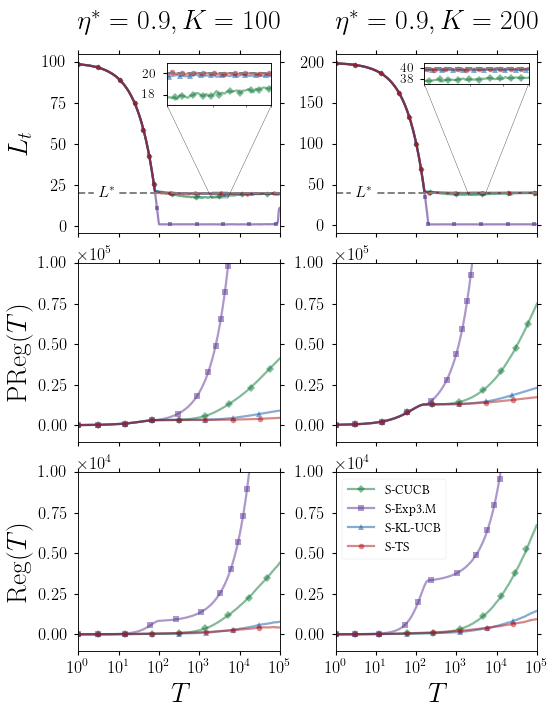

/home/fouchee/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:1743: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


In [56]:
%matplotlib notebook

fig, axes = plt.subplots(3, 2, sharex=True, figsize=(7,9))
axees = axes.flatten()

generators = ['StaticGenerator-100', 'StaticGenerator-200']
expectedgains = [expected_gains100, expected_gains200]
targets = [20,40]
netas = [0.9,0.9]
pullrefs = [pullref100, pullref200]

# top plots
offset = 0

for j,gen in enumerate(generators):
    subdata = masterdata[masterdata["bandit"].isin(selected_bandits)]
    data_grouped = subdata[subdata["generator"] == gen].groupby("bandit")
    
    plt.sca(axees[j+offset])
    for i,df in data_grouped:
        df = df.sort_values("iteration").reset_index()
        indices = np.unique([math.floor(np.power(10,x/100)) for x in range(500)])
        df = df.iloc[[0] + list(indices)]
        name = df['bandit'][0]
        if(name in ["OD", "OR"]):
            pass
        else:
            lw = 2
            df['k'].plot(label=prettynames[name], linewidth=lw, logx=True, linestyle=styledictionary[name]['linestyle'],
                                markevery=0.1, alpha=0.6, markersize=4,# logx=True,
                               marker= styledictionary[name]['marker'], c=styledictionary[name]['color'])

    plt.axhline(y=targets[j], linestyle="--", c="grey")
    plt.text(5, targets[j], "$L^*$", fontsize=15, va='center', ha='center', backgroundcolor='w')
    plt.tick_params(top=True, right=True)
    
    if(j == 0):
        plt.ylabel("$L_t$")
        
    #plt.ylim((0,100))
    plt.title(r'$\eta^* = %s, K=%s$'%(netas[j], gen.split("-")[-1]), y=1.1)
    #plt.axhline(y=107, c="black", linestyle=":", clip_on=False)

    ax = plt.gca()
    from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes
    axins = zoomed_inset_axes(ax, 6.5, loc=1)

    for i,df in data_grouped:
        df = df.sort_values("iteration").reset_index()
        indices = np.unique([math.floor(np.power(10,x/100)) for x in range(500)])
        df = df.iloc[[0] + list(indices)]
        name = df['bandit'][0]
        if(name in ["OD", "OR"]):
            pass
        else:
            lw = 2
            if(styledictionary[name]['linestyle'] == ":"):
                df['k'].plot(label=prettynames[name],linewidth=lw, logx=True, linestyle=styledictionary[name]['linestyle'],
                                    markevery=0.1, alpha=0.5, markersize=5, dashes=(1,1),
                                   marker= styledictionary[name]['marker'], c=styledictionary[name]['color'])
            else:
                df['k'].plot(label=prettynames[name],linewidth=lw, logx=True, linestyle=styledictionary[name]['linestyle'],
                                    markevery=0.1, alpha=0.5, markersize=5,
                                   marker= styledictionary[name]['marker'], c=styledictionary[name]['color'])

    x1, x2, y1, y2 = 2000, 5000, targets[j]-3, targets[j]+1 # specify the limits
    axins.set_xlim(x1, x2) # apply the x-limits
    axins.set_ylim(y1, y2) # apply the y-limits

    axins.tick_params(axis='x',which='both',labelbottom='off')
    plt.tick_params(axis="both", labelsize=12)

    plt.axhline(y=targets[j], linestyle="--", c="grey")
    plt.yticks([targets[j],targets[j]-2], ["$%s$"%(targets[j]),"$%s$"%(targets[j]-2)])

    from mpl_toolkits.axes_grid1.inset_locator import mark_inset
    mark_inset(ax, axins, loc1=3, loc2=4, fc="none", ec="0.1")
    
# middle plots   
offset = 2

for j,gen in enumerate(generators):
    subdata = masterdata[masterdata["bandit"].isin(selected_bandits)]
    data_grouped = subdata[subdata["generator"] == gen].groupby("bandit")
    
    pullref = pullrefs[j]

    plt.sca(axees[j+offset])
    for i,df in data_grouped:
        ks = df.sort_values("iteration").reset_index().k
        regret = np.abs(pullrefs[j] - ks)
        cumsum = regret.cumsum()
        indices = np.unique([math.floor(np.power(10,x/100)) for x in range(500)])
        cumsum = cumsum.iloc[[0] + list(indices)]
        name = df.iloc[0,0]
        if(name in ["OD", "OR"]):
            pass # do not plot it 
        else:
            lw = 2
            if(styledictionary[name]['linestyle'] == ":"):
                cumsum.plot(label=prettynames[name],linewidth=lw, logx=True, linestyle=styledictionary[name]['linestyle'],
                                    markevery=0.1, alpha=0.5, markersize=5, dashes=(1,1),
                                   marker= styledictionary[name]['marker'], c=styledictionary[name]['color'])
            else:
                cumsum.plot(label=prettynames[name],linewidth=lw, logx=True, linestyle=styledictionary[name]['linestyle'],
                                    markevery=0.1, alpha=0.5, markersize=5,
                                   marker= styledictionary[name]['marker'], c=styledictionary[name]['color'])
    plt.tick_params(top=True, right=True)
    
    if(j == 0):
        plt.ylabel("$\mathrm{PReg}(T)$")
        
    plt.ylim((-10000,100000))

    
    plt.ticklabel_format(axis="y", style="sci", scilimits=(0,0))
    
# lower plots 
offset = 4


for j,gen in enumerate(generators):
    subdata = masterdata[masterdata["bandit"].isin(selected_bandits)]
    data_grouped = subdata[subdata["generator"] == gen].groupby("bandit")
    
    plt.sca(axees[j+offset])
    for i,df in data_grouped:
        ks = df.sort_values("iteration").reset_index().k
        gains = df.sort_values("iteration").reset_index().gain
        regret = [expectedgains[j][int((x-1)*100)]*x for x in ks] - gains
        cumsum = regret.cumsum()
        indices = np.unique([math.floor(np.power(10,x/100)) for x in range(500)])
        cumsum = cumsum.iloc[[0] + list(indices)]
        name = df.iloc[0,0]
        if(name in ["OD", "OR"]):
            pass # do not plot it 
        else:
            lw = 2
            if(styledictionary[name]['linestyle'] == ":"):
                cumsum.plot(label=prettynames[name],linewidth=lw, logx=True, linestyle=styledictionary[name]['linestyle'],
                                    markevery=0.1, alpha=0.5, markersize=5, dashes=(1,1),
                                   marker= styledictionary[name]['marker'], c=styledictionary[name]['color'])
            else:
                cumsum.plot(label=prettynames[name],linewidth=lw, logx=True, linestyle=styledictionary[name]['linestyle'],
                                    markevery=0.1, alpha=0.5, markersize=5,
                                   marker= styledictionary[name]['marker'], c=styledictionary[name]['color'])

    plt.tick_params(top=True, right=True)
    
    if(j == 0):
        plt.ylabel(r"$\mathrm{Reg}(T)$")
    else:
        plt.legend(fontsize = 12, ncol=1, loc='best')
        
    plt.ylim((-1000,10000))
    plt.ticklabel_format(axis="y", style="sci", scilimits=(0,0))
    
    plt.xlabel("$T$")
    plt.xticks([1,10,100,1000,10000,100000])
    
plt.tight_layout()
plt.savefig("static_experiment_K_100_200.pdf")




<IPython.core.display.Javascript object>


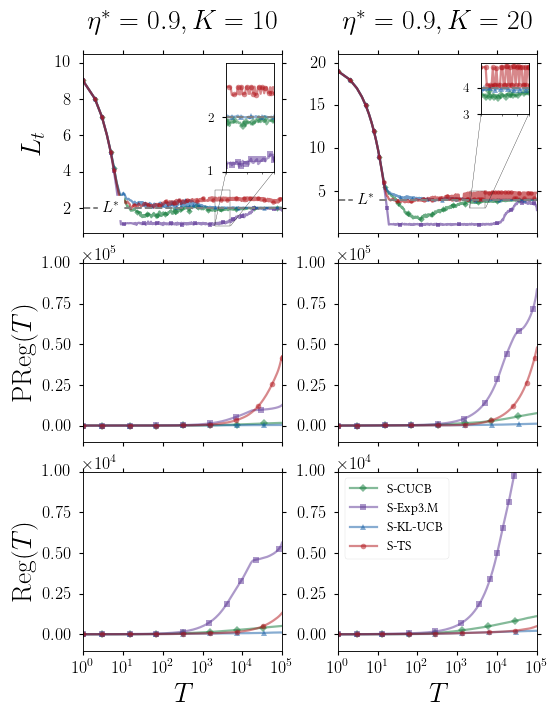

/home/fouchee/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:1743: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


In [61]:
%matplotlib notebook

fig, axes = plt.subplots(3, 2, sharex=True, figsize=(7,9))
axees = axes.flatten()

generators = ['StaticGenerator-10', 'StaticGenerator-20']
expectedgains = [expected_gains10, expected_gains20]
targets = [2,4]
netas = [0.9,0.9]
pullrefs = [pullref10, pullref20]

# top plots
offset = 0

for j,gen in enumerate(generators):
    subdata = masterdata[masterdata["bandit"].isin(selected_bandits)]
    data_grouped = subdata[subdata["generator"] == gen].groupby("bandit")
    
    plt.sca(axees[j+offset])
    for i,df in data_grouped:
        df = df.sort_values("iteration").reset_index()
        indices = np.unique([math.floor(np.power(10,x/100)) for x in range(500)])
        df = df.iloc[[0] + list(indices)]
        name = df['bandit'][0]
        if(name in ["OD", "OR"]):
            pass
        else:
            lw = 2
            df['k'].plot(label=prettynames[name], linewidth=lw, logx=True, linestyle=styledictionary[name]['linestyle'],
                                markevery=0.1, alpha=0.6, markersize=4,# logx=True,
                               marker= styledictionary[name]['marker'], c=styledictionary[name]['color'])

    plt.axhline(y=targets[j], linestyle="--", c="grey")
    plt.text(5, targets[j], "$L^*$", fontsize=15, va='center', ha='center', backgroundcolor='w')
    plt.tick_params(top=True, right=True)
    
    if(j == 0):
        plt.ylabel("$L_t$")
        
    #plt.ylim((0,100))
    plt.title(r'$\eta^* = %s, K=%s$'%(netas[j], gen.split("-")[-1]), y=1.1)
    #plt.axhline(y=107, c="black", linestyle=":", clip_on=False)

    ax = plt.gca()
    from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes
    axins = zoomed_inset_axes(ax, 3, loc=1)

    for i,df in data_grouped:
        df = df.sort_values("iteration").reset_index()
        indices = np.unique([math.floor(np.power(10,x/100)) for x in range(500)])
        df = df.iloc[[0] + list(indices)]
        name = df['bandit'][0]
        if(name in ["OD", "OR"]):
            pass
        else:
            lw = 2
            if(styledictionary[name]['linestyle'] == ":"):
                df['k'].plot(label=prettynames[name],linewidth=lw, logx=True, linestyle=styledictionary[name]['linestyle'],
                                    markevery=0.1, alpha=0.5, markersize=5, dashes=(1,1),
                                   marker= styledictionary[name]['marker'], c=styledictionary[name]['color'])
            else:
                df['k'].plot(label=prettynames[name],linewidth=lw, logx=True, linestyle=styledictionary[name]['linestyle'],
                                    markevery=0.1, alpha=0.5, markersize=5,
                                   marker= styledictionary[name]['marker'], c=styledictionary[name]['color'])

    x1, x2, y1, y2 = 2000, 5000, targets[j], targets[j]+1 # specify the limits
    axins.set_xlim(x1, x2) # apply the x-limits
    axins.set_ylim(y1, y2) # apply the y-limits

    axins.tick_params(axis='x',which='both',labelbottom='off')
    plt.tick_params(axis="both", labelsize=12)

    plt.axhline(y=targets[j], linestyle="--", c="grey")
    plt.yticks([targets[j],targets[j]-1], ["$%s$"%(targets[j]),"$%s$"%(targets[j]-1)])

    from mpl_toolkits.axes_grid1.inset_locator import mark_inset
    mark_inset(ax, axins, loc1=3, loc2=4, fc="none", ec="0.1")
    
# middle plots   
offset = 2

for j,gen in enumerate(generators):
    subdata = masterdata[masterdata["bandit"].isin(selected_bandits)]
    data_grouped = subdata[subdata["generator"] == gen].groupby("bandit")
    
    pullref = pullrefs[j]

    plt.sca(axees[j+offset])
    for i,df in data_grouped:
        ks = df.sort_values("iteration").reset_index().k
        regret = np.abs(pullrefs[j] - ks)
        cumsum = regret.cumsum()
        indices = np.unique([math.floor(np.power(10,x/100)) for x in range(500)])
        cumsum = cumsum.iloc[[0] + list(indices)]
        name = df.iloc[0,0]
        if(name in ["OD", "OR"]):
            pass # do not plot it 
        else:
            lw = 2
            if(styledictionary[name]['linestyle'] == ":"):
                cumsum.plot(label=prettynames[name],linewidth=lw, logx=True, linestyle=styledictionary[name]['linestyle'],
                                    markevery=0.1, alpha=0.5, markersize=5, dashes=(1,1),
                                   marker= styledictionary[name]['marker'], c=styledictionary[name]['color'])
            else:
                cumsum.plot(label=prettynames[name],linewidth=lw, logx=True, linestyle=styledictionary[name]['linestyle'],
                                    markevery=0.1, alpha=0.5, markersize=5,
                                   marker= styledictionary[name]['marker'], c=styledictionary[name]['color'])
    plt.tick_params(top=True, right=True)
    
    if(j == 0):
        plt.ylabel("$\mathrm{PReg}(T)$")
        
    plt.ylim((-10000,100000))

    
    plt.ticklabel_format(axis="y", style="sci", scilimits=(0,0))
    
# lower plots 
offset = 4


for j,gen in enumerate(generators):
    subdata = masterdata[masterdata["bandit"].isin(selected_bandits)]
    data_grouped = subdata[subdata["generator"] == gen].groupby("bandit")
    
    plt.sca(axees[j+offset])
    for i,df in data_grouped:
        ks = df.sort_values("iteration").reset_index().k
        gains = df.sort_values("iteration").reset_index().gain
        regret = [expectedgains[j][int((x-1)*100)]*x for x in ks] - gains
        cumsum = regret.cumsum()
        indices = np.unique([math.floor(np.power(10,x/100)) for x in range(500)])
        cumsum = cumsum.iloc[[0] + list(indices)]
        name = df.iloc[0,0]
        if(name in ["OD", "OR"]):
            pass # do not plot it 
        else:
            lw = 2
            if(styledictionary[name]['linestyle'] == ":"):
                cumsum.plot(label=prettynames[name],linewidth=lw, logx=True, linestyle=styledictionary[name]['linestyle'],
                                    markevery=0.1, alpha=0.5, markersize=5, dashes=(1,1),
                                   marker= styledictionary[name]['marker'], c=styledictionary[name]['color'])
            else:
                cumsum.plot(label=prettynames[name],linewidth=lw, logx=True, linestyle=styledictionary[name]['linestyle'],
                                    markevery=0.1, alpha=0.5, markersize=5,
                                   marker= styledictionary[name]['marker'], c=styledictionary[name]['color'])

    plt.tick_params(top=True, right=True)
    
    if(j == 0):
        plt.ylabel(r"$\mathrm{Reg}(T)$")
    else:
        plt.legend(fontsize = 12, ncol=1, loc='best')
        
    plt.ylim((-1000,10000))
    plt.ticklabel_format(axis="y", style="sci", scilimits=(0,0))
    
    plt.xlabel("$T$")
    plt.xticks([1,10,100,1000,10000,100000])
    
plt.tight_layout()
plt.savefig("static_experiment_K_10_20.pdf")




<IPython.core.display.Javascript object>


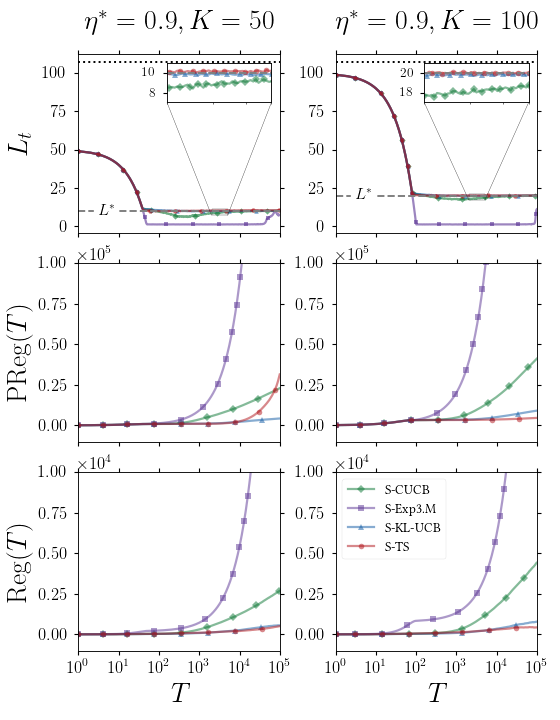

/home/fouchee/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:1743: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


In [62]:
%matplotlib notebook

fig, axes = plt.subplots(3, 2, sharex=True, figsize=(7,9))
axees = axes.flatten()

generators = ['StaticGenerator-50', 'StaticGenerator-100']
expectedgains = [expected_gains50, expected_gains100]
targets = [10,20]
netas = [0.9,0.9]
pullrefs = [pullref50, pullref100]

# top plots
offset = 0

for j,gen in enumerate(generators):
    subdata = masterdata[masterdata["bandit"].isin(selected_bandits)]
    data_grouped = subdata[subdata["generator"] == gen].groupby("bandit")
    
    plt.sca(axees[j+offset])
    for i,df in data_grouped:
        df = df.sort_values("iteration").reset_index()
        indices = np.unique([math.floor(np.power(10,x/100)) for x in range(500)])
        df = df.iloc[[0] + list(indices)]
        name = df['bandit'][0]
        if(name in ["OD", "OR"]):
            pass
        else:
            lw = 2
            df['k'].plot(label=prettynames[name], linewidth=lw, logx=True, linestyle=styledictionary[name]['linestyle'],
                                markevery=0.1, alpha=0.6, markersize=4,# logx=True,
                               marker= styledictionary[name]['marker'], c=styledictionary[name]['color'])

    plt.axhline(y=targets[j], linestyle="--", c="grey")
    plt.text(5, targets[j], "$L^*$", fontsize=15, va='center', ha='center', backgroundcolor='w')
    plt.tick_params(top=True, right=True)
    
    if(j == 0):
        plt.ylabel("$L_t$")
        
    #plt.ylim((0,100))
    plt.title(r'$\eta^* = %s, K=%s$'%(netas[j], gen.split("-")[-1]), y=1.1)
    plt.axhline(y=107, c="black", linestyle=":", clip_on=False)

    ax = plt.gca()
    from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes
    axins = zoomed_inset_axes(ax, 6.5, loc=1)

    for i,df in data_grouped:
        df = df.sort_values("iteration").reset_index()
        indices = np.unique([math.floor(np.power(10,x/100)) for x in range(500)])
        df = df.iloc[[0] + list(indices)]
        name = df['bandit'][0]
        if(name in ["OD", "OR"]):
            pass
        else:
            lw = 2
            if(styledictionary[name]['linestyle'] == ":"):
                df['k'].plot(label=prettynames[name],linewidth=lw, logx=True, linestyle=styledictionary[name]['linestyle'],
                                    markevery=0.1, alpha=0.5, markersize=5, dashes=(1,1),
                                   marker= styledictionary[name]['marker'], c=styledictionary[name]['color'])
            else:
                df['k'].plot(label=prettynames[name],linewidth=lw, logx=True, linestyle=styledictionary[name]['linestyle'],
                                    markevery=0.1, alpha=0.5, markersize=5,
                                   marker= styledictionary[name]['marker'], c=styledictionary[name]['color'])

    x1, x2, y1, y2 = 2000, 5000, targets[j]-3, targets[j]+1 # specify the limits
    axins.set_xlim(x1, x2) # apply the x-limits
    axins.set_ylim(y1, y2) # apply the y-limits

    axins.tick_params(axis='x',which='both',labelbottom='off')
    plt.tick_params(axis="both", labelsize=12)

    plt.axhline(y=targets[j], linestyle="--", c="grey")
    plt.yticks([targets[j],targets[j]-2], ["$%s$"%(targets[j]),"$%s$"%(targets[j]-2)])

    from mpl_toolkits.axes_grid1.inset_locator import mark_inset
    mark_inset(ax, axins, loc1=3, loc2=4, fc="none", ec="0.1")
    
# middle plots   
offset = 2

for j,gen in enumerate(generators):
    subdata = masterdata[masterdata["bandit"].isin(selected_bandits)]
    data_grouped = subdata[subdata["generator"] == gen].groupby("bandit")
    
    pullref = pullrefs[j]

    plt.sca(axees[j+offset])
    for i,df in data_grouped:
        ks = df.sort_values("iteration").reset_index().k
        regret = np.abs(pullrefs[j] - ks)
        cumsum = regret.cumsum()
        indices = np.unique([math.floor(np.power(10,x/100)) for x in range(500)])
        cumsum = cumsum.iloc[[0] + list(indices)]
        name = df.iloc[0,0]
        if(name in ["OD", "OR"]):
            pass # do not plot it 
        else:
            lw = 2
            if(styledictionary[name]['linestyle'] == ":"):
                cumsum.plot(label=prettynames[name],linewidth=lw, logx=True, linestyle=styledictionary[name]['linestyle'],
                                    markevery=0.1, alpha=0.5, markersize=5, dashes=(1,1),
                                   marker= styledictionary[name]['marker'], c=styledictionary[name]['color'])
            else:
                cumsum.plot(label=prettynames[name],linewidth=lw, logx=True, linestyle=styledictionary[name]['linestyle'],
                                    markevery=0.1, alpha=0.5, markersize=5,
                                   marker= styledictionary[name]['marker'], c=styledictionary[name]['color'])
    plt.tick_params(top=True, right=True)
    
    if(j == 0):
        plt.ylabel("$\mathrm{PReg}(T)$")
        
    plt.ylim((-10000,100000))

    
    plt.ticklabel_format(axis="y", style="sci", scilimits=(0,0))
    
# lower plots 
offset = 4


for j,gen in enumerate(generators):
    subdata = masterdata[masterdata["bandit"].isin(selected_bandits)]
    data_grouped = subdata[subdata["generator"] == gen].groupby("bandit")
    
    plt.sca(axees[j+offset])
    for i,df in data_grouped:
        ks = df.sort_values("iteration").reset_index().k
        gains = df.sort_values("iteration").reset_index().gain
        regret = [expectedgains[j][int((x-1)*100)]*x for x in ks] - gains
        cumsum = regret.cumsum()
        indices = np.unique([math.floor(np.power(10,x/100)) for x in range(500)])
        cumsum = cumsum.iloc[[0] + list(indices)]
        name = df.iloc[0,0]
        if(name in ["OD", "OR"]):
            pass # do not plot it 
        else:
            lw = 2
            if(styledictionary[name]['linestyle'] == ":"):
                cumsum.plot(label=prettynames[name],linewidth=lw, logx=True, linestyle=styledictionary[name]['linestyle'],
                                    markevery=0.1, alpha=0.5, markersize=5, dashes=(1,1),
                                   marker= styledictionary[name]['marker'], c=styledictionary[name]['color'])
            else:
                cumsum.plot(label=prettynames[name],linewidth=lw, logx=True, linestyle=styledictionary[name]['linestyle'],
                                    markevery=0.1, alpha=0.5, markersize=5,
                                   marker= styledictionary[name]['marker'], c=styledictionary[name]['color'])

    plt.tick_params(top=True, right=True)
    
    if(j == 0):
        plt.ylabel(r"$\mathrm{Reg}(T)$")
    else:
        plt.legend(fontsize = 12, ncol=1, loc='best')
        
    plt.ylim((-1000,10000))
    plt.ticklabel_format(axis="y", style="sci", scilimits=(0,0))
    
    plt.xlabel("$T$")
    plt.xticks([1,10,100,1000,10000,100000])
    
plt.tight_layout()
plt.savefig("static_experiment_K_50_100.pdf")


